<a href="https://colab.research.google.com/github/wcolglazier/Additional-AI-Class-Content/blob/main/4_Predicting_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using AI to Predict House Prices**  <!-- Largest size -->



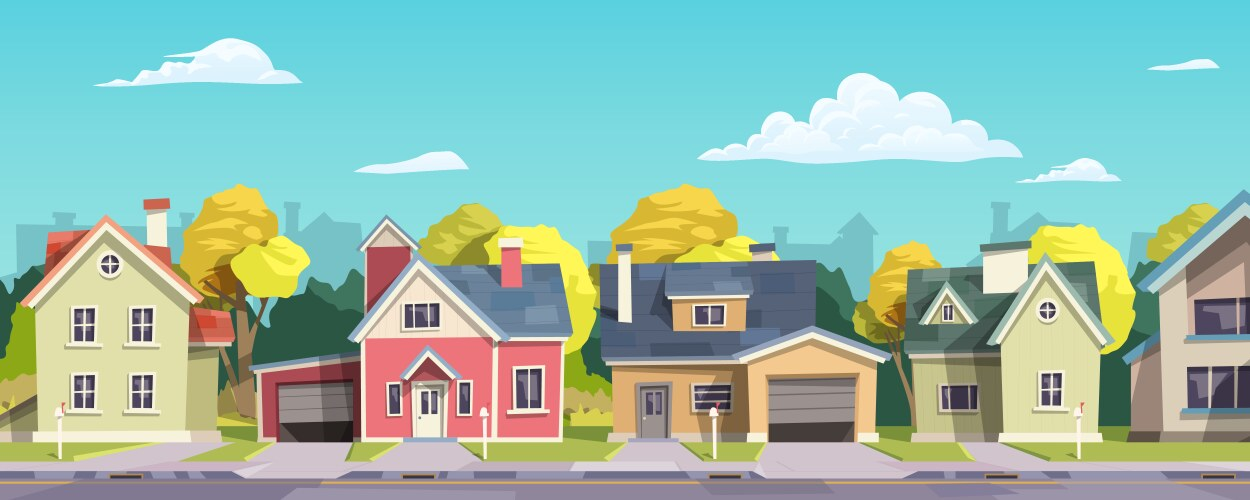

In [31]:
import numpy as np
import pandas as pd



In this notebook, we analyze data from houses in a neighborhood, including the following data points:

- **Size**: The size of each house in square meters.
- **Bedrooms**: The number of bedrooms in each house.
- **Bathrooms**: The number of bathrooms in each house.


We will use this data to predict house prices by fitting a model to the data and making a statistical prediction.



In [32]:
House_data = np.array([
    [1500, 3, 2],
    [1800, 4, 3],
    [1200, 2, 1],
    [2000, 4, 2],
    [850, 1, 1],
    [1600, 3, 2],
    [2200, 5, 3],
    [1400, 3, 2],
    [950, 2, 1],
    [1750, 4, 3],
])

prices = np.array([350, 450, 200, 500, 120, 360, 600, 280, 150, 420])


data = pd.DataFrame(House_data, columns=["Size", "Bedrooms", "Bathrooms"])
data["Price"] = prices

print(data)


   Size  Bedrooms  Bathrooms  Price
0  1500         3          2    350
1  1800         4          3    450
2  1200         2          1    200
3  2000         4          2    500
4   850         1          1    120
5  1600         3          2    360
6  2200         5          3    600
7  1400         3          2    280
8   950         2          1    150
9  1750         4          3    420


We import PyTorch, a machine learning library with built-in functions that facilitate the efficient processing, training, and deployment of neural networks and machine learning models.

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim

We input data represented as features for house size, bathroom count, and bedroom count, along with labels for the data.

In [34]:
features = np.array([
    [1500, 3, 2],   # 1
    [1800, 4, 3],   # 2
    [1200, 2, 1],   # 3
    [2000, 4, 2],   # 4
    [850, 1, 1],    # 5
    [1600, 3, 2],   # 6
    [2200, 5, 3],   # 7
    [1400, 3, 2],   # 8
    [950, 2, 1],    # 9
    [1750, 4, 3],   # 10
    [500, 1, 1],    # 11
    [600, 1, 1],    # 12
    [750, 2, 1],    # 13
    [550, 1, 1],    # 14
    [700, 2, 1],    # 15
    [2800, 5, 4],   # 16
    [3000, 6, 5],   # 17
    [3200, 6, 5],   # 18
    [3500, 7, 5],   # 19
    [4000, 8, 6]    # 20
], dtype=np.float32)

prices = np.array([
    225.00,  # 1
    270.00,  # 2
    180.00,  # 3
    300.00,  # 4
    127.50,  # 5
    240.00,  # 6
    330.00,  # 7
    210.00,  # 8
    142.50,  # 9
    262.50,  # 10
    75.00,   # 11
    90.00,   # 12
    112.50,  # 13
    82.50,   # 14
    105.00,  # 15
    420.00,  # 16
    450.00,  # 17
    480.00,  # 18
    525.00,  # 19
    600.00   # 20
], dtype=np.float32)

Boilerplate code that standardizing data and preparing it for training by splitting it into training and validation sets, normalizing features and target values, and converting them into PyTorch tensors.


In [35]:
indices = np.arange(len(features))
np.random.seed(42)
np.random.shuffle(indices)

split = int(len(features) * 0.8)
train_idx, val_idx = indices[:split], indices[split:]

X_train, X_val = features[train_idx], features[val_idx]
y_train, y_val = prices[train_idx], prices[val_idx]

X_mean, X_std = X_train.mean(axis=0), X_train.std(axis=0)
X_train_scaled = (X_train - X_mean) / X_std
X_val_scaled = (X_val - X_mean) / X_std

y_mean, y_std = y_train.mean(), y_train.std()
y_train_scaled = (y_train - y_mean) / y_std
y_val_scaled = (y_val - y_mean) / y_std

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_scaled, dtype=torch.float32).view(-1, 1)

This represents the layers with weights and biases that we learned about earlier, but in a more efficient and structured format.

In [36]:
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.layer1 = nn.Linear(3, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        return self.layer3(x)

Here, we go through the layers and train the model to fit our feature data to the prices data.

In [37]:
model = RegressionModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

epochs = 5000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Training Loss: {loss.item():.6f}")

model.eval()
with torch.no_grad():
    predictions_val_scaled = model(X_val_tensor).numpy()

predictions_val = predictions_val_scaled * y_std + y_mean

print("\nDone Training!")

Epoch 0, Training Loss: 1.136486
Epoch 500, Training Loss: 0.000119
Epoch 1000, Training Loss: 0.000008
Epoch 1500, Training Loss: 0.000000
Epoch 2000, Training Loss: 0.000000
Epoch 2500, Training Loss: 0.000000
Epoch 3000, Training Loss: 0.000000
Epoch 3500, Training Loss: 0.000000
Epoch 4000, Training Loss: 0.000000
Epoch 4500, Training Loss: 0.000000

Done Training!


We can now use the neural network we have built to input new data and predict house prices based on previous pricing patterns.

In [38]:
size = float(input("Enter house size (sq meters): "))
bedrooms = int(input("Enter number of bedrooms: "))
bathrooms = int(input("Enter number of bathrooms: "))

new_houses = np.array([[size, bedrooms, bathrooms]], dtype=np.float32)
new_houses_scaled = (new_houses - X_mean) / X_std
new_houses_tensor = torch.tensor(new_houses_scaled, dtype=torch.float32)

model.eval()
with torch.no_grad():
    new_predictions_scaled = model(new_houses_tensor).numpy()

new_predictions = new_predictions_scaled * y_std + y_mean

# Print the predicted price
print("\nPredicted Price for the New House:")
print(f"House: ${new_predictions[0][0]:.2f}")

Enter house size (sq meters): 1400
Enter number of bedrooms: 5
Enter number of bathrooms: 5

Predicted Price for the New House:
House: $205.53
